In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('bmh')

import plots
plots.plot_width = 10

# plots to draw in do_plots_all()
all_plots = ['select_real', 'store_real',
             'obj_select_real', 'obj_last_insert_real',
             'obj_insert_real', 'obj_store',
             'src_select_real', 'src_insert_real',
             'fsrc_select_real', 'fsrc_insert_real']
whiskers = 4.


# Cassandra evaluation continues

Summary of results with simulation of ~180k visits with ap_proto and 3-node Cassandra cluster at PDAC.

- JIRA ticket: https://jira.lsstcorp.org/browse/DM-23881


In [2]:
data_files_mpi7_cms = [
    "data/DM-23881/apdb-pdac-mpi7-20200317T191417.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200317T221021.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200318T014138.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200318T054557.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200318T103114.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200318T162416.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200319T010349.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200319T091741.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200319T183853.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200320T052120.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200320T130909.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200321T015133.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200321T094211.csv.gz",
]
data_files_mpi7_mix = [
    "data/DM-23881/apdb-pdac-mpi7-20200322T073219.csv.gz",
]
data_files_mpi7_g1gc = [
    "data/DM-23881/apdb-pdac-mpi7-20200322T163155.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200322T175349.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200322T212249.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200323T110341.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200323T200450.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200324T085518.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200324T184526.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200325T050436.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200325T113359.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200325T161408.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200326T032706.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200326T151452.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200326T234752.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200327T123450.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200328T014322.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200328T114358.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200328T152913.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200328T234959.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200329T135908.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200330T044920.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200330T201740.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200331T040431.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200331T200142.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200401T123759.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200402T054545.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200402T210411.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200403T173650.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200404T120123.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200405T065248.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200406T021541.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200406T223159.csv.gz",
]

In [3]:
frames_cms = [plots._read_csv(file, filter_count=False)[0] for file in data_files_mpi7_cms]
frames_mix = [plots._read_csv(file, filter_count=False)[0] for file in data_files_mpi7_mix]
frames_g1gc = [plots._read_csv(file, filter_count=False)[0] for file in data_files_mpi7_g1gc]

In [4]:
df_mpi7_cms = pd.concat(frames_cms)
df_mpi7_cms["gc"] = 0
df_mpi7_mix = pd.concat(frames_mix)
df_mpi7_mix["gc"] = 1
df_mpi7_g1gc = pd.concat(frames_g1gc)
df_mpi7_g1gc["gc"] = 2
df_mpi7 = pd.concat([df_mpi7_cms, df_mpi7_mix, df_mpi7_g1gc])

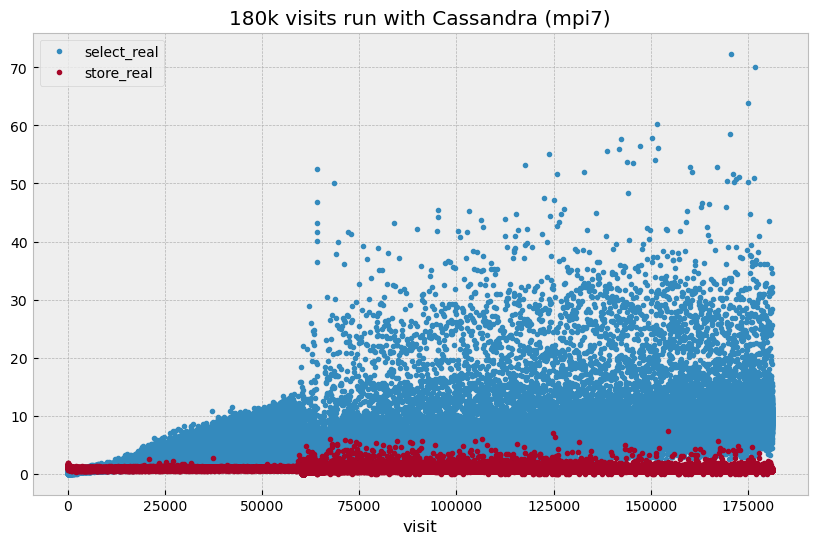

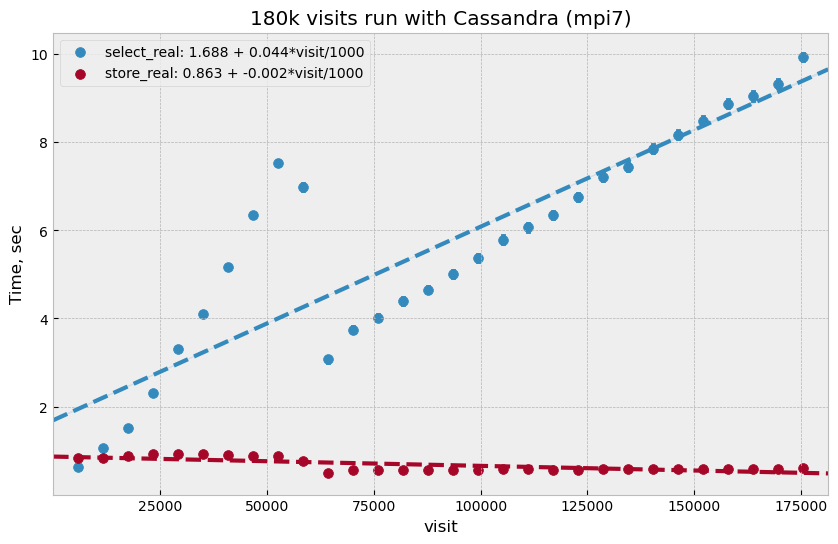

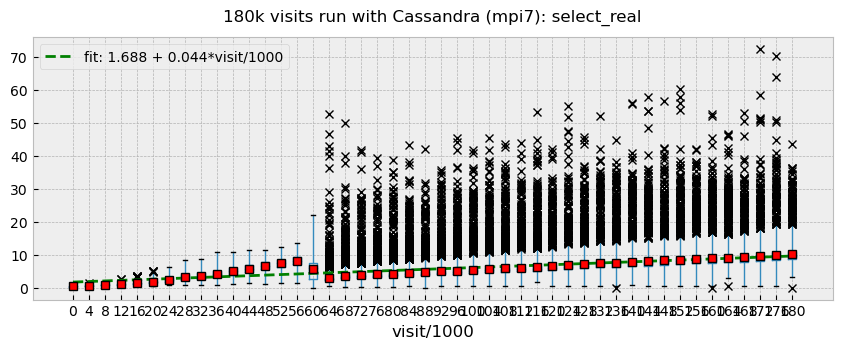

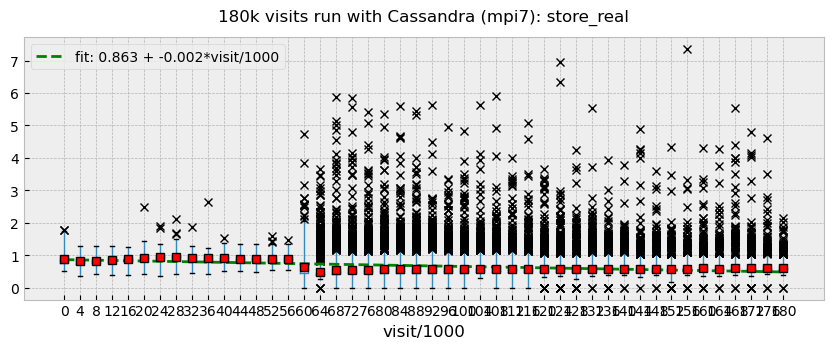

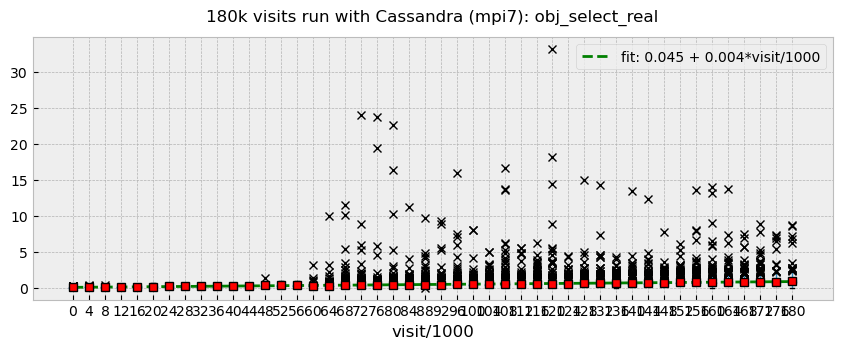

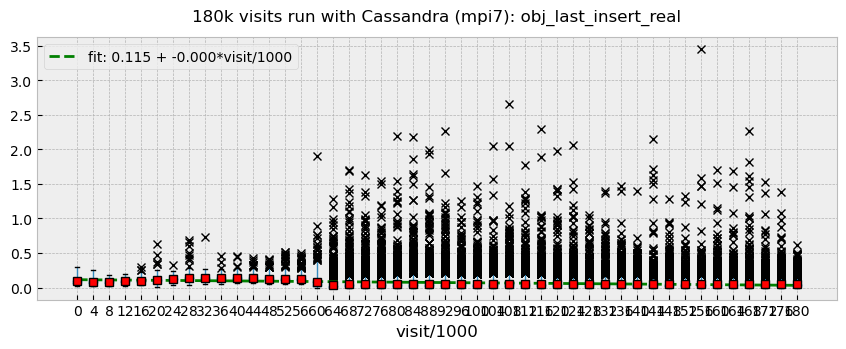

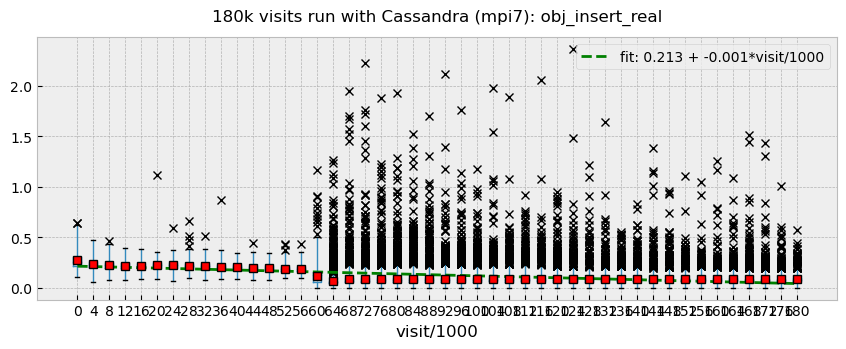

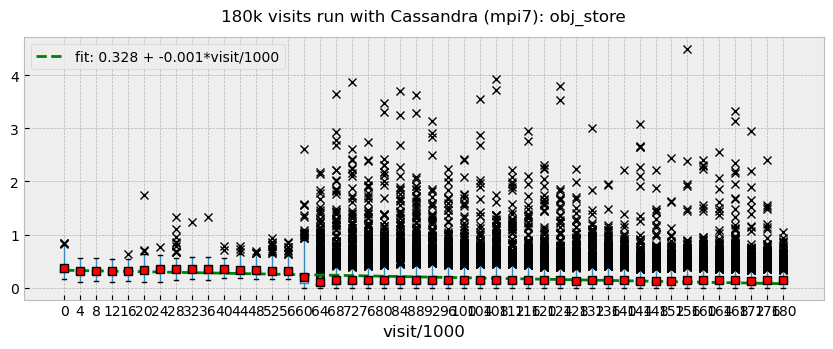

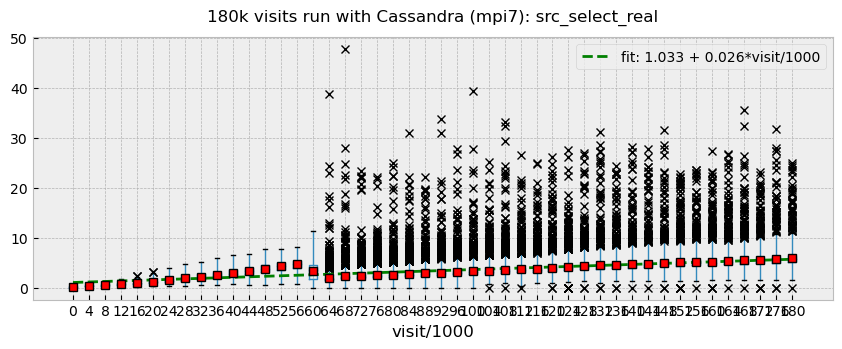

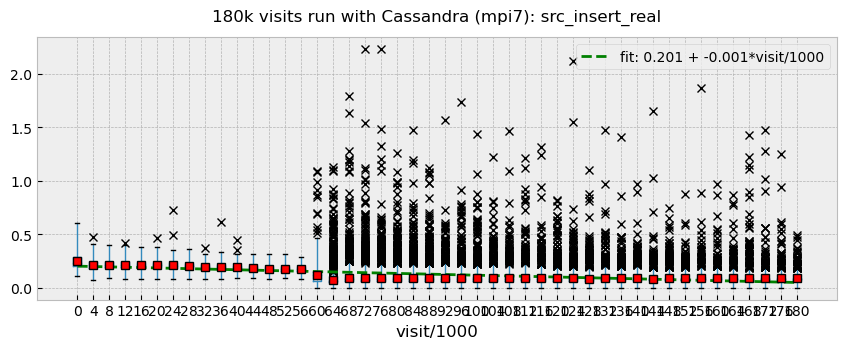

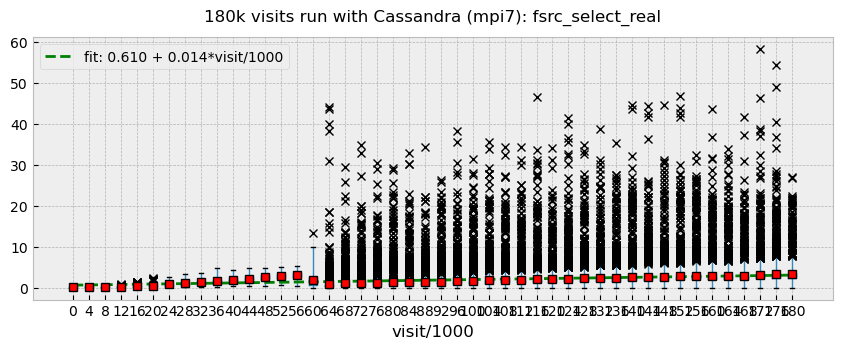

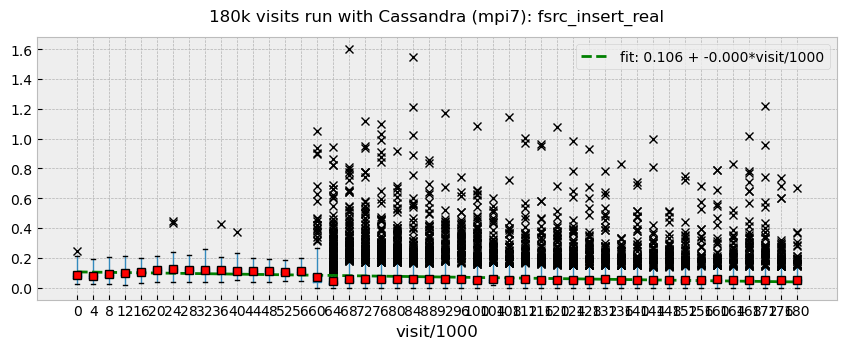

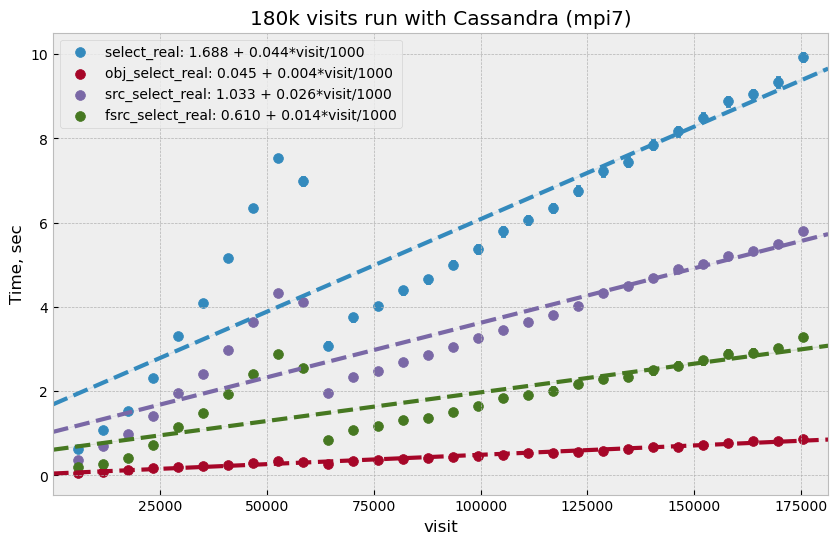

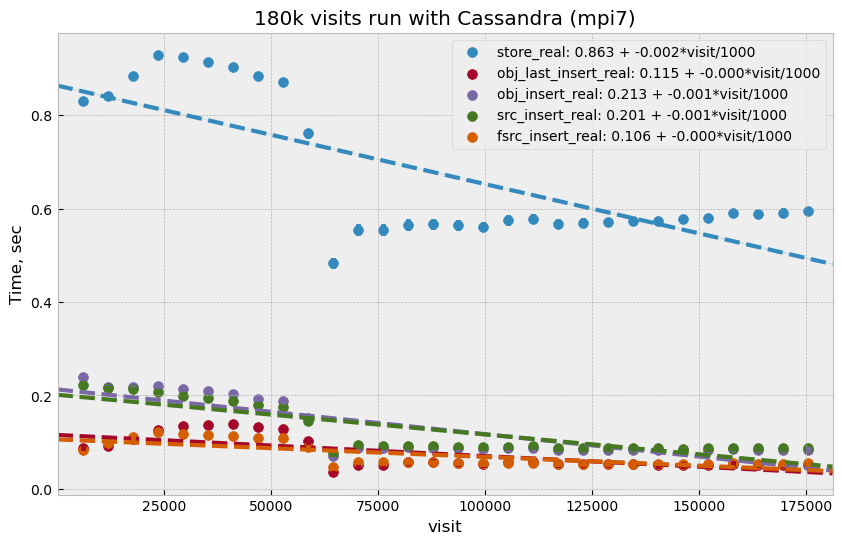

In [26]:
title = "180k visits run with Cassandra (mpi7)"
plots.do_plots_all(df_mpi7, title, bin=4000, plots=all_plots, whis=whiskers);

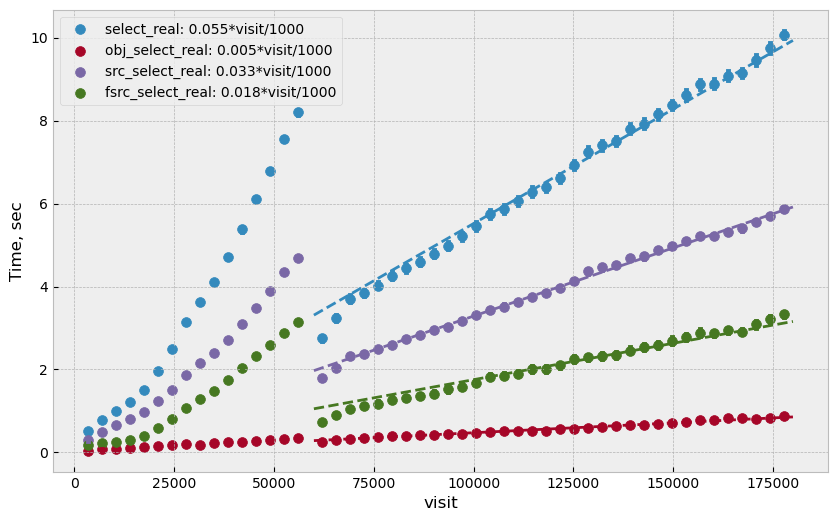

In [6]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 6))

ds = pd.concat([df_mpi7_cms, df_mpi7_g1gc])

for col, c in zip(['select_real', 'obj_select_real', 'src_select_real', 'fsrc_select_real'], ["C0", "C1", "C2", "C3"]):
    par = plots.fit_times(df_mpi7_g1gc, col, 'lin')
    label = "{}: {:.3f}*visit/1000".format(col, par[0]*1000)
    sns.regplot(ds.index, col, data=ds, x_bins=50, fit_reg=False, label=label, ax=ax, color=c)
    x = np.array([60000., 180000.])
    y = x * par[0]
    plt.plot(x, y, c + "--")
    

ax.set_ylabel("Time, sec")
ax.legend(loc="best");

## Second try with reduced JVM memory

This is still with one Cassandra process per host, memory allocation for JVM reduced from 160GB to 96GB. Replica count is set to 2, but clients use default consistency setting which I think is LOCAL_ONE (only waiting for one replica to respond).

In [6]:
data_files_mpi8 = [
    "data/DM-23881/apdb-pdac-mpi8-20200410T181714.csv.gz",
    "data/DM-23881/apdb-pdac-mpi8-20200410T212619.csv.gz",
    "data/DM-23881/apdb-pdac-mpi8-20200411T010049.csv.gz",
    "data/DM-23881/apdb-pdac-mpi8-20200411T045747.csv.gz",
    "data/DM-23881/apdb-pdac-mpi8-20200411T091915.csv.gz",
    "data/DM-23881/apdb-pdac-mpi8-20200411T141014.csv.gz",
    "data/DM-23881/apdb-pdac-mpi8-20200411T192711.csv.gz",
    "data/DM-23881/apdb-pdac-mpi8-20200412T010502.csv.gz",
    "data/DM-23881/apdb-pdac-mpi8-20200412T071032.csv.gz",
    "data/DM-23881/apdb-pdac-mpi8-20200412T134526.csv.gz",
    "data/DM-23881/apdb-pdac-mpi8-20200412T204946.csv.gz",
    "data/DM-23881/apdb-pdac-mpi8-20200413T042524.csv.gz",
    "data/DM-23881/apdb-pdac-mpi8-20200413T122645.csv.gz",
    "data/DM-23881/apdb-pdac-mpi8-20200413T205909.csv.gz",
    "data/DM-23881/apdb-pdac-mpi8-20200414T060326.csv.gz",
    "data/DM-23881/apdb-pdac-mpi8-20200414T153705.csv.gz",
    "data/DM-23881/apdb-pdac-mpi8-20200415T014921.csv.gz",
    "data/DM-23881/apdb-pdac-mpi8-20200415T123834.csv.gz",
    "data/DM-23881/apdb-pdac-mpi8-20200415T235957.csv.gz",
    "data/DM-23881/apdb-pdac-mpi8-20200416T114646.csv.gz",
]

In [7]:
frames = [plots._read_csv(file, filter_count=False)[0] for file in data_files_mpi8]

In [8]:
df_mpi8 = pd.concat(frames)
del frames

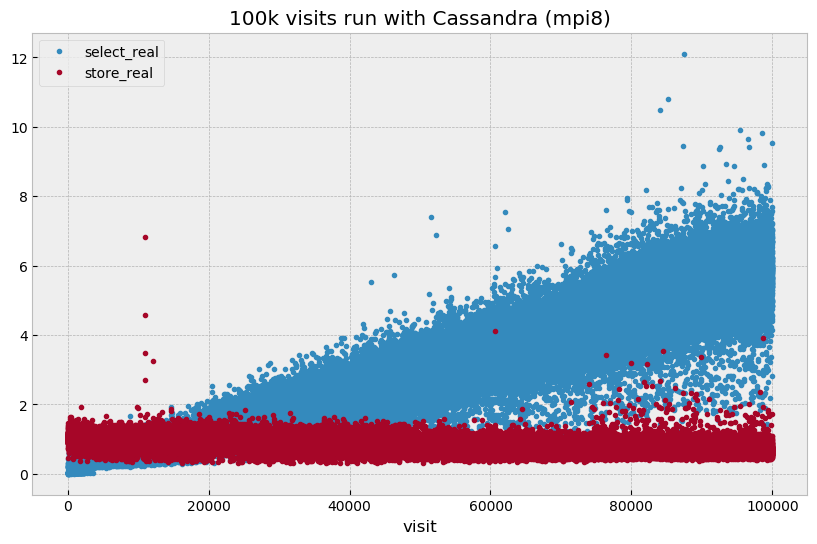

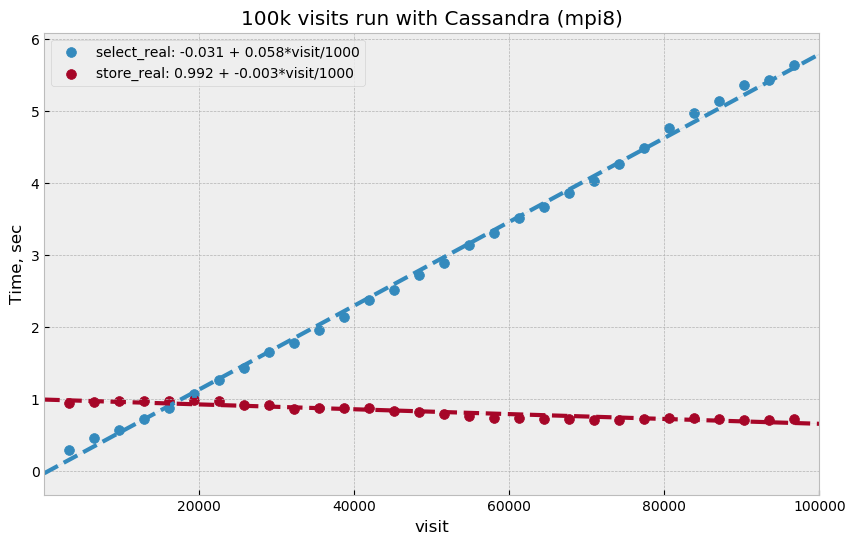

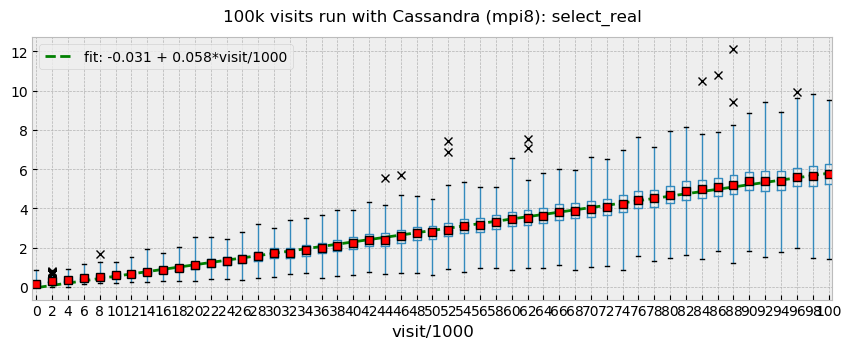

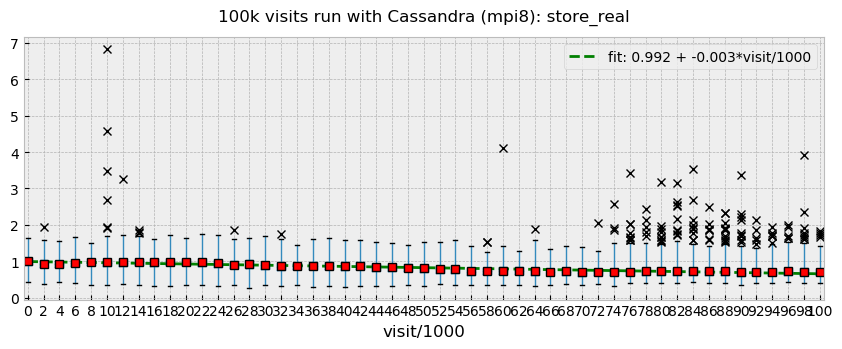

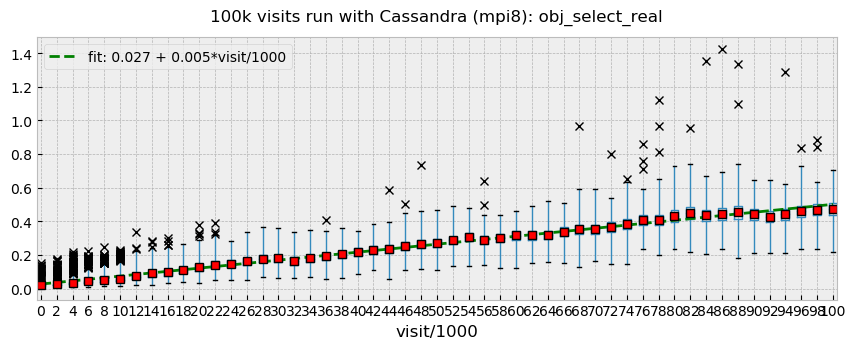

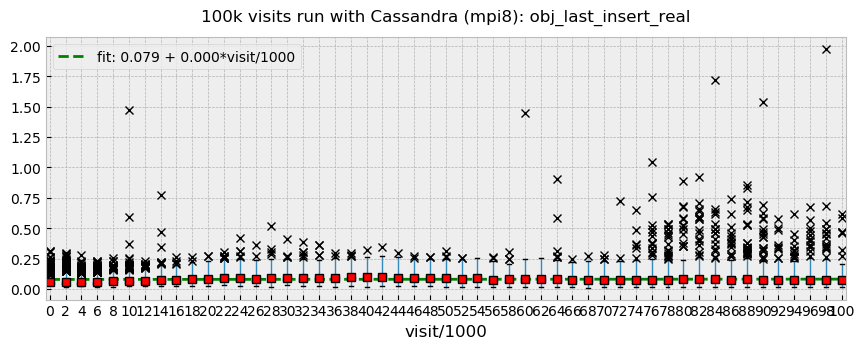

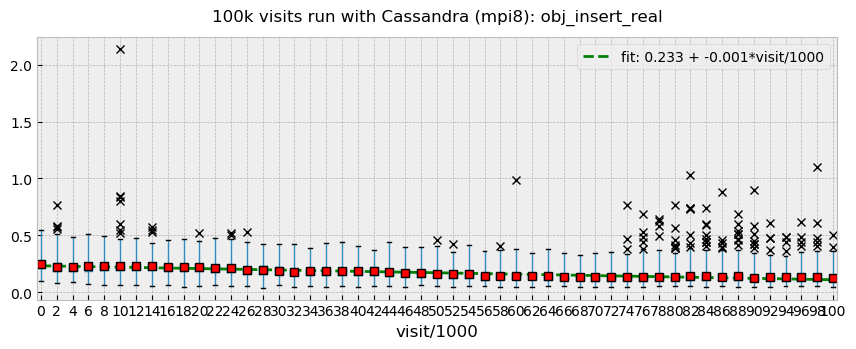

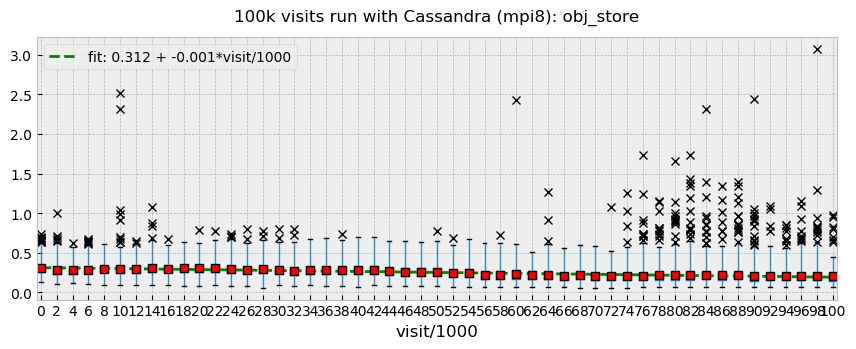

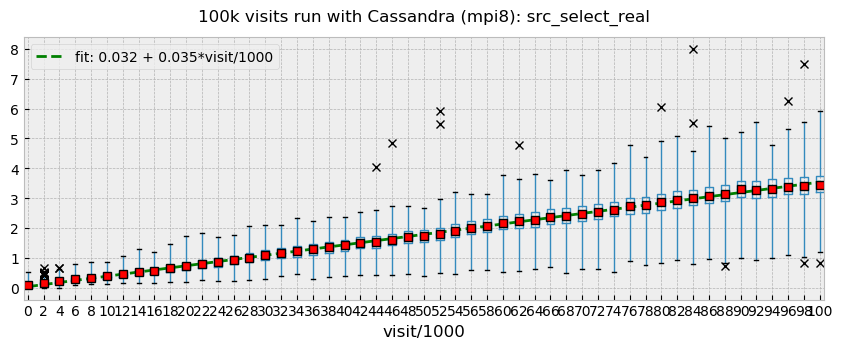

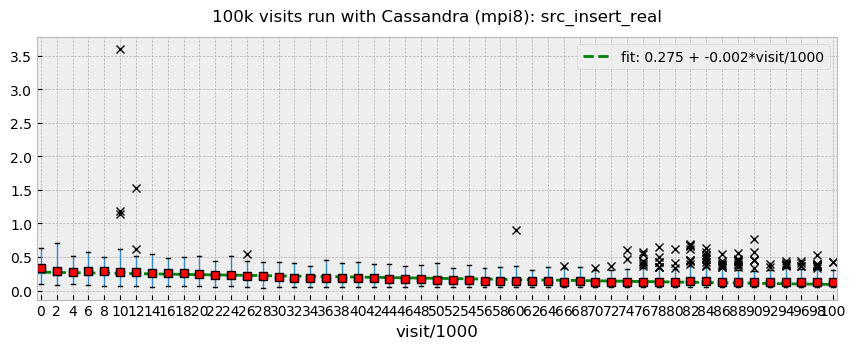

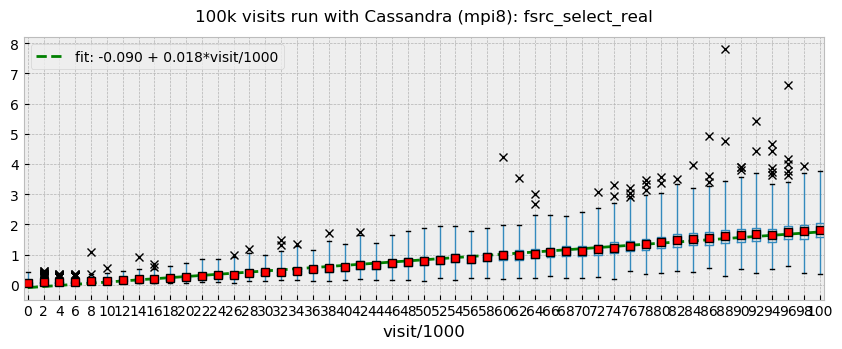

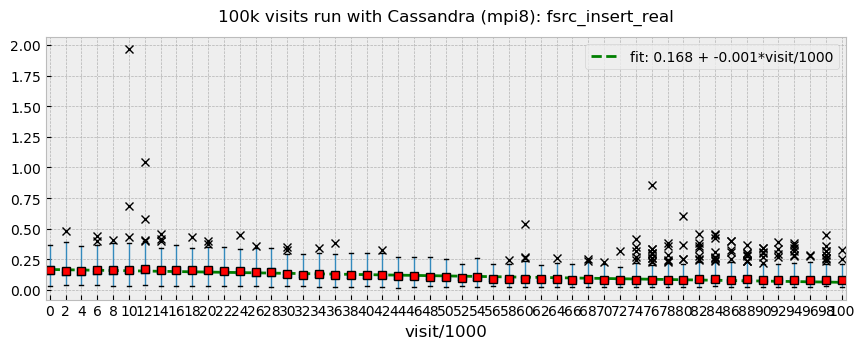

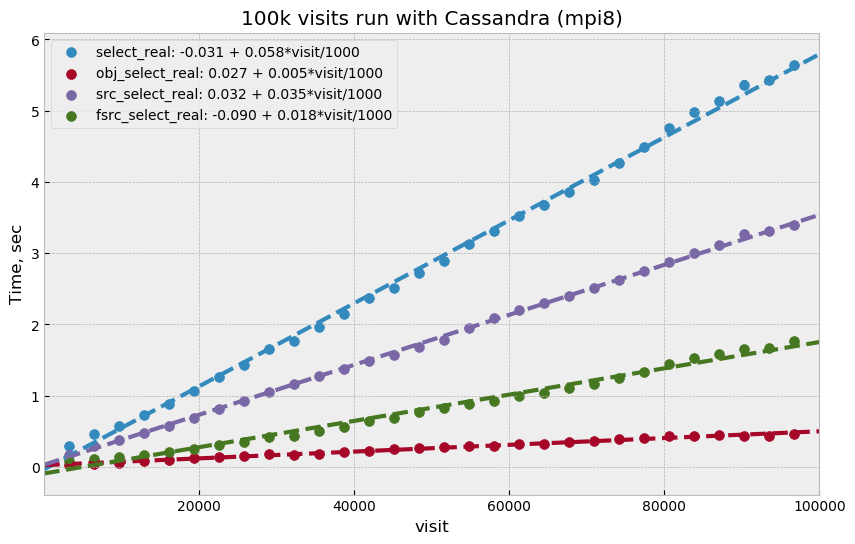

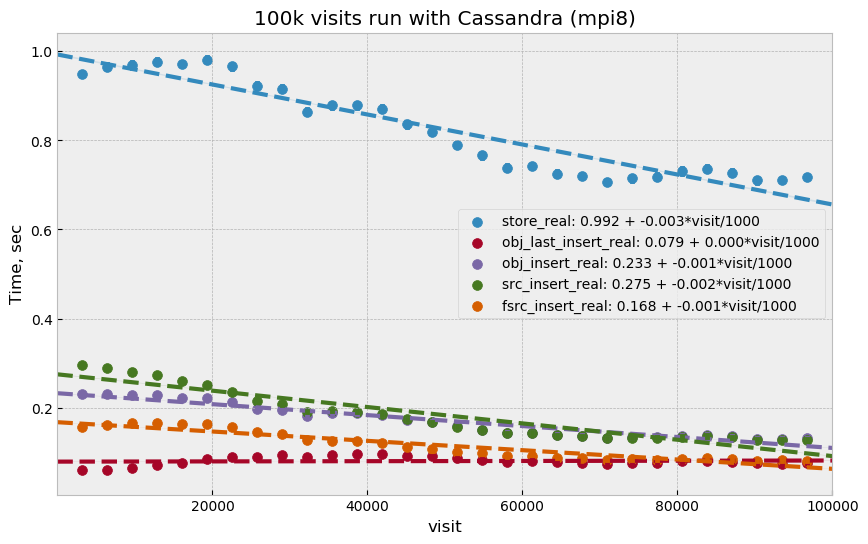

In [9]:
title = "100k visits run with Cassandra (mpi8)"
plots.do_plots_all(df_mpi8, title, bin=2000, plots=all_plots, whis=whiskers);

## Third round with replication factor 3

This test runs multiple instances of Cassandra per host (in docker), one instance per data disk (4 instances on master02, 5 instances on each of master03/04). 

Replication factor is set to 3 for `apdb` database, and conistency level on clent side is set to `QUORUM` (meaning 2 in this case).

In [10]:
data_files_mpi9 = [
    "data/DM-23881/apdb-pdac-mpi9-20200419T190504.csv.gz",
    "data/DM-23881/apdb-pdac-mpi9-20200419T214642.csv.gz",
    "data/DM-23881/apdb-pdac-mpi9-20200420T011711.csv.gz",
    "data/DM-23881/apdb-pdac-mpi9-20200420T053120.csv.gz",
    "data/DM-23881/apdb-pdac-mpi9-20200420T104712.csv.gz",
    "data/DM-23881/apdb-pdac-mpi9-20200420T164302.csv.gz",
    "data/DM-23881/apdb-pdac-mpi9-20200420T235925.csv.gz",
    "data/DM-23881/apdb-pdac-mpi9-20200421T071934.csv.gz",
    "data/DM-23881/apdb-pdac-mpi9-20200421T154552.csv.gz",
    "data/DM-23881/apdb-pdac-mpi9-20200422T005835.csv.gz",
    "data/DM-23881/apdb-pdac-mpi9-20200422T105220.csv.gz",
    "data/DM-23881/apdb-pdac-mpi9-20200422T213957.csv.gz",
    "data/DM-23881/apdb-pdac-mpi9-20200423T101435.csv.gz",
    "data/DM-23881/apdb-pdac-mpi9-20200423T222513.csv.gz",
    "data/DM-23881/apdb-pdac-mpi9-20200424T115024.csv.gz",
    "data/DM-23881/apdb-pdac-mpi9-20200425T021305.csv.gz",
    "data/DM-23881/apdb-pdac-mpi9-20200426T005209.csv.gz",
    "data/DM-23881/apdb-pdac-mpi9-20200426T190026.csv.gz",
    "data/DM-23881/apdb-pdac-mpi9-20200427T121935.csv.gz",
    "data/DM-23881/apdb-pdac-mpi9-20200428T064211.csv.gz",
]

In [11]:
frames = [plots._read_csv(file, filter_count=False)[0] for file in data_files_mpi9]

In [12]:
df_mpi9 = pd.concat(frames)
del frames

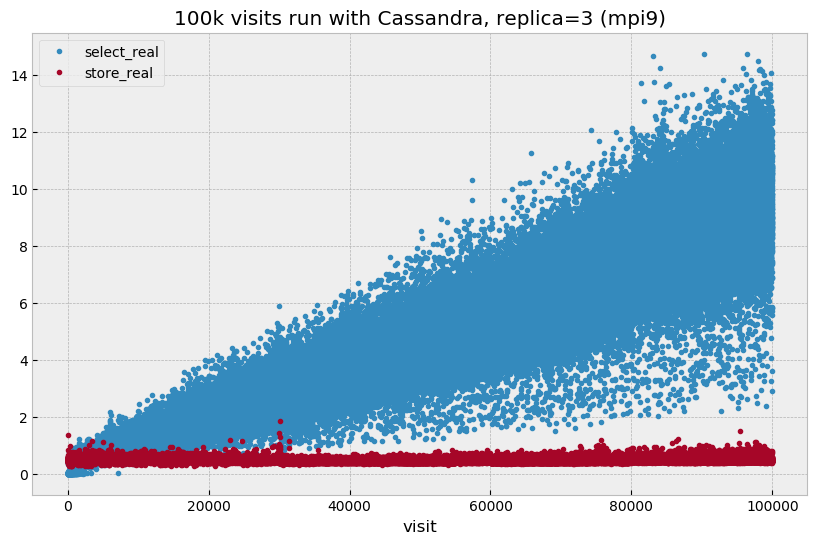

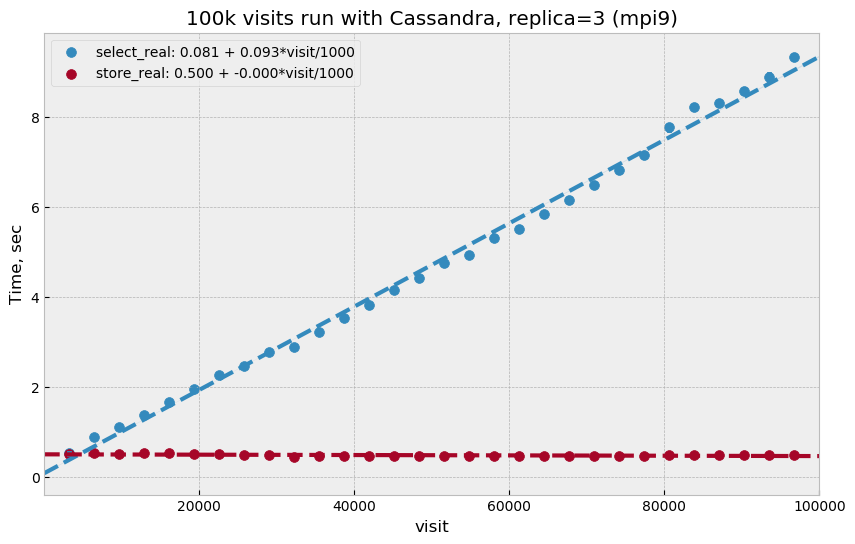

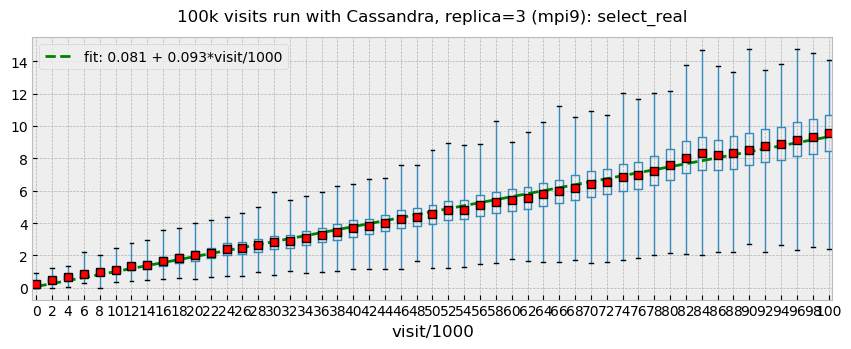

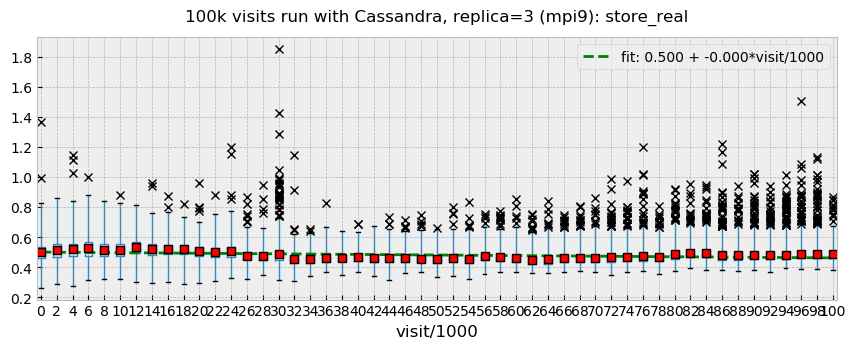

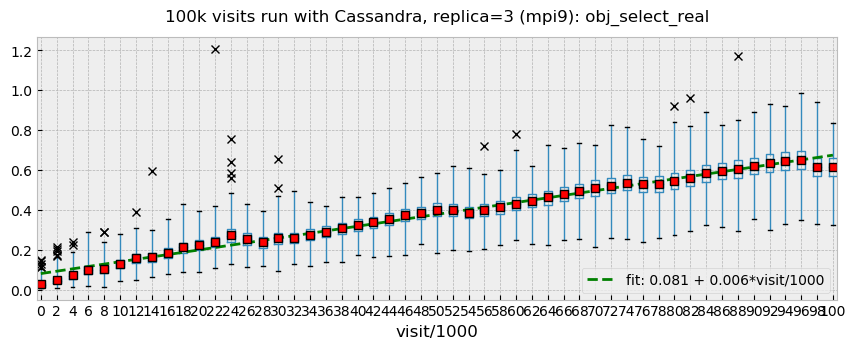

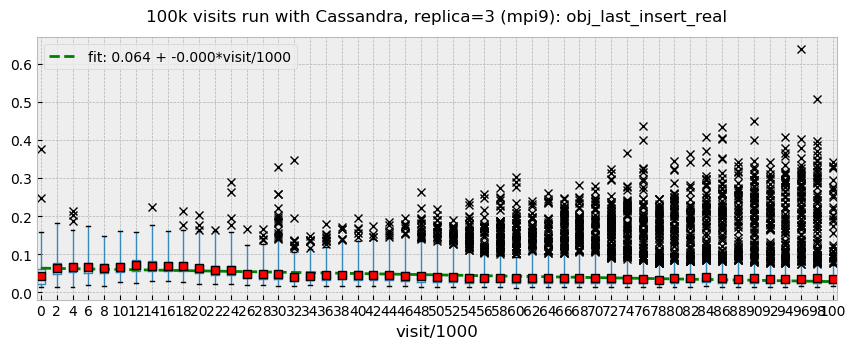

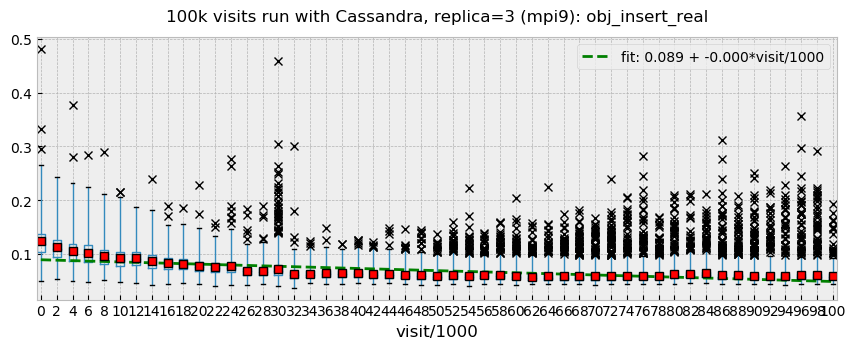

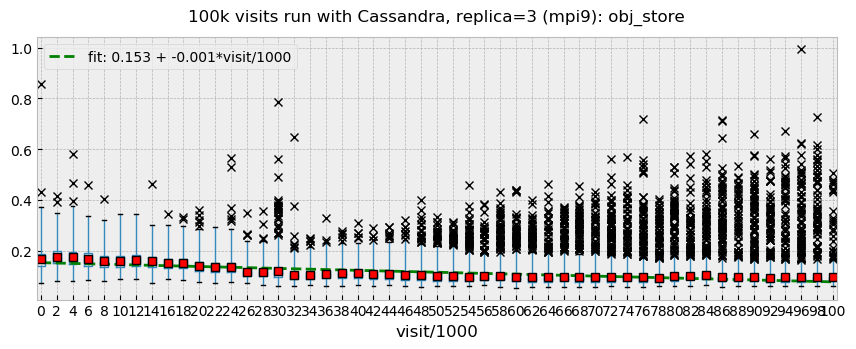

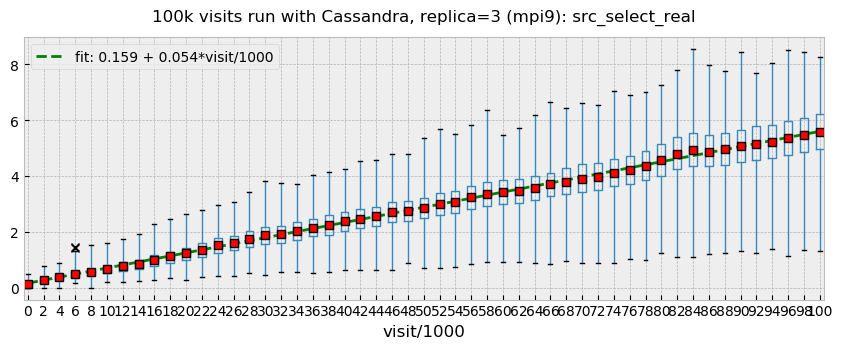

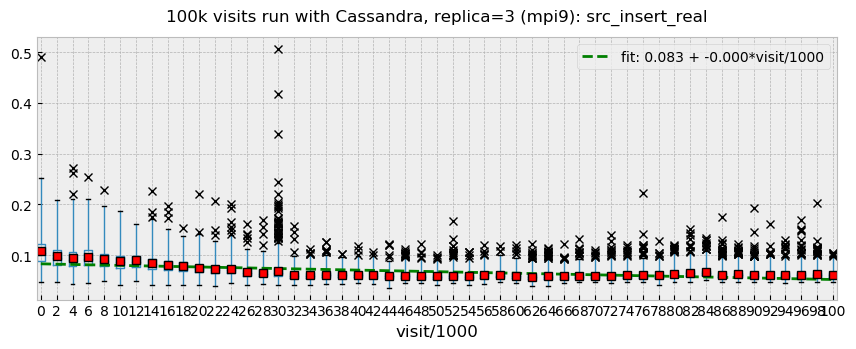

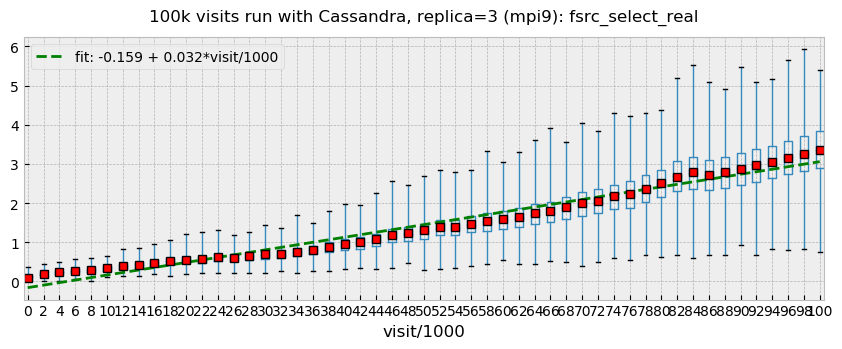

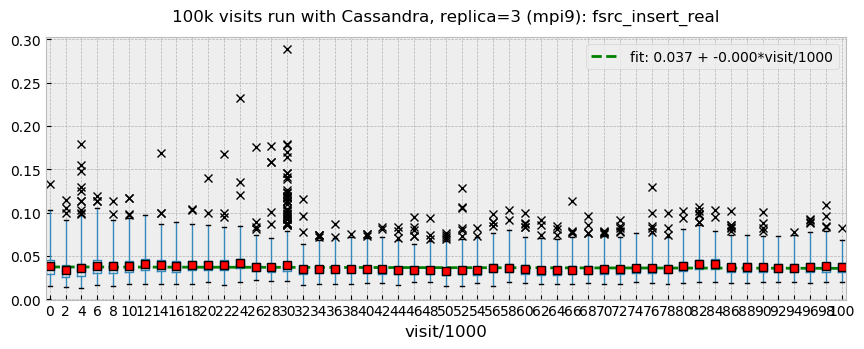

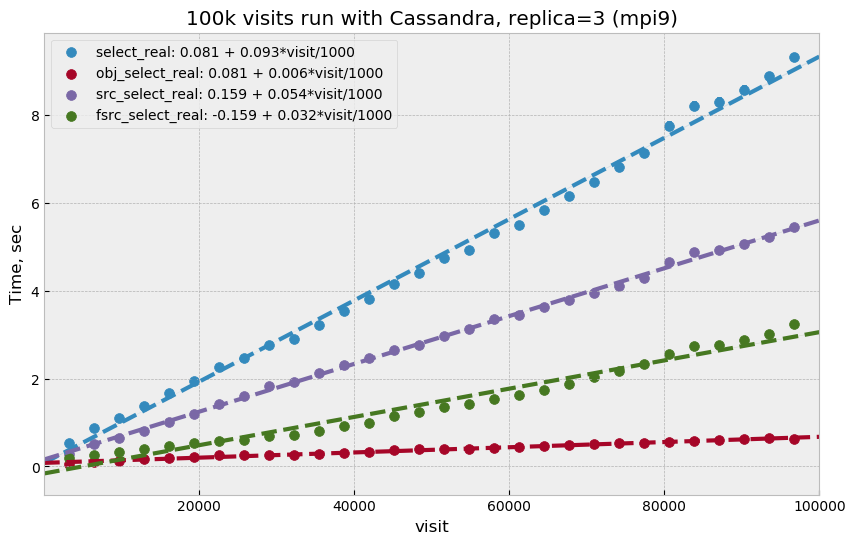

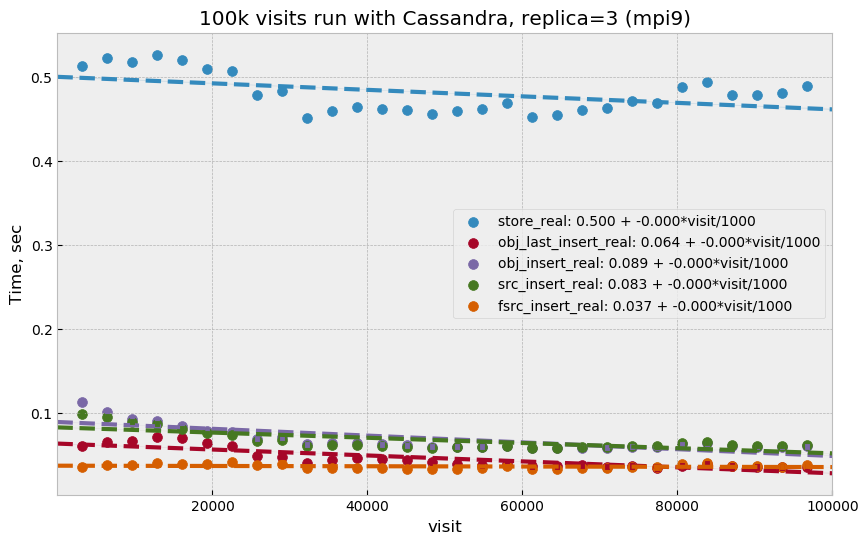

In [13]:
title = "100k visits run with Cassandra, replica=3 (mpi9)"
plots.do_plots_all(df_mpi9, title, bin=2000, plots=all_plots, whis=whiskers);